<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p2_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

In [ ]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras import regularizers
import os
import math

In [ ]:
np.random.seed(21)
tf.random.set_seed(21)

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
num_classes=10

In [ ]:
x_train.shape, x_test.shape, y_train.shape, x_train[1].shape

((60000, 28, 28), (10000, 28, 28), (60000,), (28, 28))

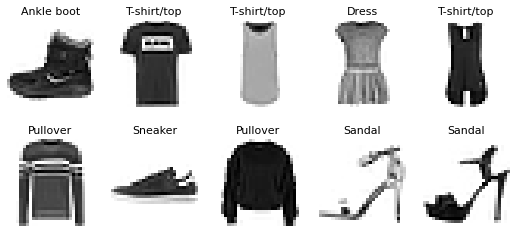

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(9, 4))
for index, image in enumerate(x_train[:10,:]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=11)
plt.show()

Now we convert class target vectors to binary class matrices

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)# cause error without this code: from tensorflow import keras
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
x_train=x_train.astype('float32')/255   #normalize tha data
x_test=x_test.astype('float32')/255

In [ ]:
model=keras.models.Sequential()
input_shape=x_train.shape[1:]

model.add(Conv1D(filters=32,kernel_size=3, padding='same',activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv1D(64,2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(rate=0.3))


model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            2720      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 32)            2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 64)            4

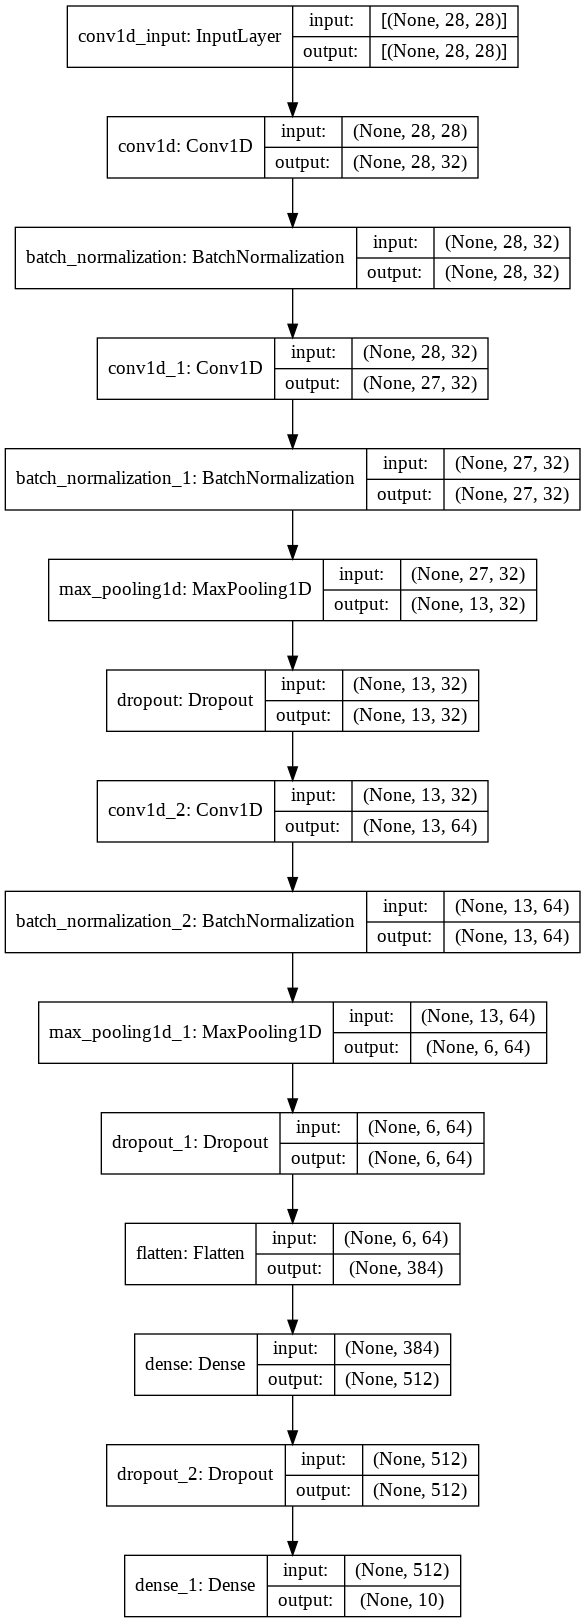

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')

checkpoint=keras.callbacks.ModelCheckpoint('p2.cnn.fashion_mnist.h5', save_best_only=True)
early_stopping= keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=1, restore_best_weights=False
) #Stop training when a monitored metric has stopped improving.


hist=model.fit(x_train,y_train,batch_size=32,epochs=3,
               validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/3
1500/1500 [==============================] - 25s 15ms/step - loss: 15.5325 - accuracy: 0.7260 - val_loss: 1.3943 - val_accuracy: 0.7800
Epoch 2/3
1500/1500 [==============================] - 21s 14ms/step - loss: 1.3196 - accuracy: 0.7547 - val_loss: 1.1848 - val_accuracy: 0.8059
Epoch 3/3
1500/1500 [==============================] - 21s 14ms/step - loss: 1.2020 - accuracy: 0.7704 - val_loss: 1.1055 - val_accuracy: 0.7663


In [ ]:
model=keras.models.load_model('p2.cnn.fashion_mnist.h5') #rollback to best model

In [ ]:
#history=keras.callbacks.History()
hist.history.keys(), hist.params

(dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']),
 {'epochs': 3, 'steps': 1500, 'verbose': 1})

In [ ]:
hist.history

{'accuracy': [0.7259583473205566, 0.754729151725769, 0.770354151725769],
 'loss': [15.532476425170898, 1.3196219205856323, 1.201963186264038],
 'val_accuracy': [0.7799999713897705, 0.8059166669845581, 0.7663333415985107],
 'val_loss': [1.394281029701233, 1.184828519821167, 1.1055363416671753]}

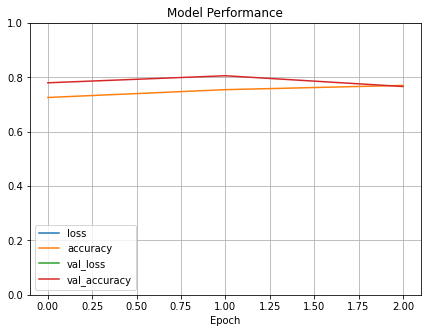

In [ ]:
  #plt.plot(hist.history['accuracy'])
  #plt.plot(hist.history['val_accuracy'])
  #plt.legend(['Train','validation'],loc='lower right')
  #or
df=pd.DataFrame(hist.history)
df.plot(figsize=(7,5))  
plt.grid()
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.title('Model Performance')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1297 - accuracy: 0.7578


[1.1296573877334595, 0.7577999830245972]

In [ ]:
model.predict(x_test[21:22,:]).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.92, 0.  , 0.03]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[21:22,:])) 

7

In [ ]:
class_names[7]

'Sneaker'

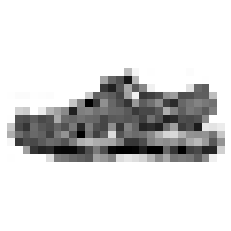

In [ ]:
plt.imshow(x_test[21], cmap='binary')
plt.axis('off')
plt.show()

**Saving & Restoring**

In [ ]:
model.save_weights('project1.weights.ckpt')

In [ ]:
model.load_weights('project1.weights.ckpt')

In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.

In 2D CNN, kernel moves in 2 directions. Input and output data of 2D CNN is 3 dimensional. Mostly used on Image data.

In 3D CNN, kernel moves in 3 directions. Input and output data of 3D CNN is 4 dimensional. Mostly used on 3D Image data (MRI, CT Scans).